<a href="https://colab.research.google.com/github/Geringer13/Netology_pyda/blob/master/Feature_engineering_diploma_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas_profiling
%matplotlib inline


data = pd.read_csv('taxi.csv')

In [0]:
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [0]:
data.shape

(100000, 14)

In [0]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [0]:
data.isnull().sum()

offer_gk                  0
weekday_key               0
hour_key                  0
driver_gk                 0
order_gk                  0
driver_latitude           0
driver_longitude          0
origin_order_latitude     0
origin_order_longitude    0
distance_km               0
duration_min              0
offer_class_group         0
ride_type_desc            0
driver_response           0
dtype: int64

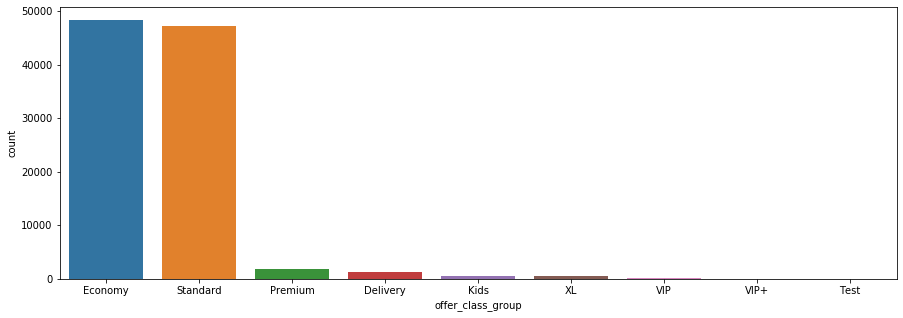

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(x='offer_class_group', 
              order=data['offer_class_group'].value_counts().index, 
              data=data)
plt.show()

In [0]:
data[data['offer_class_group']=='Test']

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
12092,849177,5,20,3763,83260,55.820917,37.650258,55.827038,37.660981,-1.0,-1.0,Test,SMB,0
31035,1122239,3,23,6290,493264,55.959273,37.415073,55.962322,37.407117,-1.0,-1.0,Test,SMB,0
43940,897797,5,20,591,83260,55.821477,37.611275,55.827038,37.660981,-1.0,-1.0,Test,SMB,1
54657,954625,1,18,172,203179,55.823113,37.508883,55.829178,37.513307,-1.0,-1.0,Test,SMB,1
65028,1039723,1,15,1916,357476,55.881810,37.654255,55.872580,37.668403,-1.0,-1.0,Test,SMB,1
82848,990065,2,14,3371,325838,55.775556,37.582864,55.773730,37.591352,-1.0,-1.0,Test,SMB,1
95758,159224,5,17,1126,392645,55.761183,37.657616,55.757251,37.659064,-1.0,-1.0,Test,SMB,1
97311,1060685,3,23,6302,493264,55.964894,37.413532,55.962322,37.407117,-1.0,-1.0,Test,SMB,1


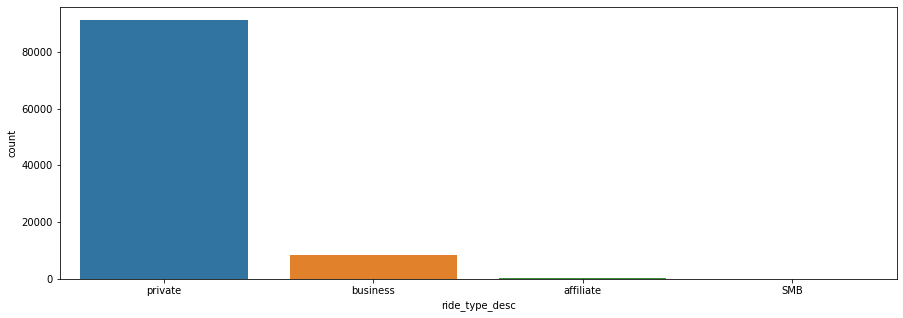

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(x='ride_type_desc', 
              order=data['ride_type_desc'].value_counts().index, 
              data=data)
plt.show()

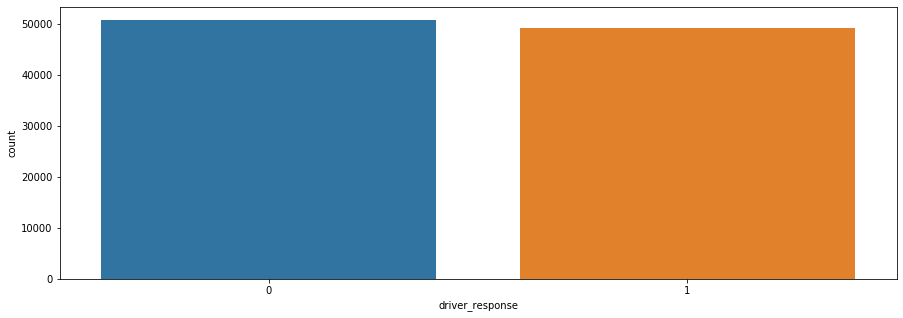

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(x='driver_response', 
              order=data['driver_response'].value_counts().index, 
              data=data)
plt.show()

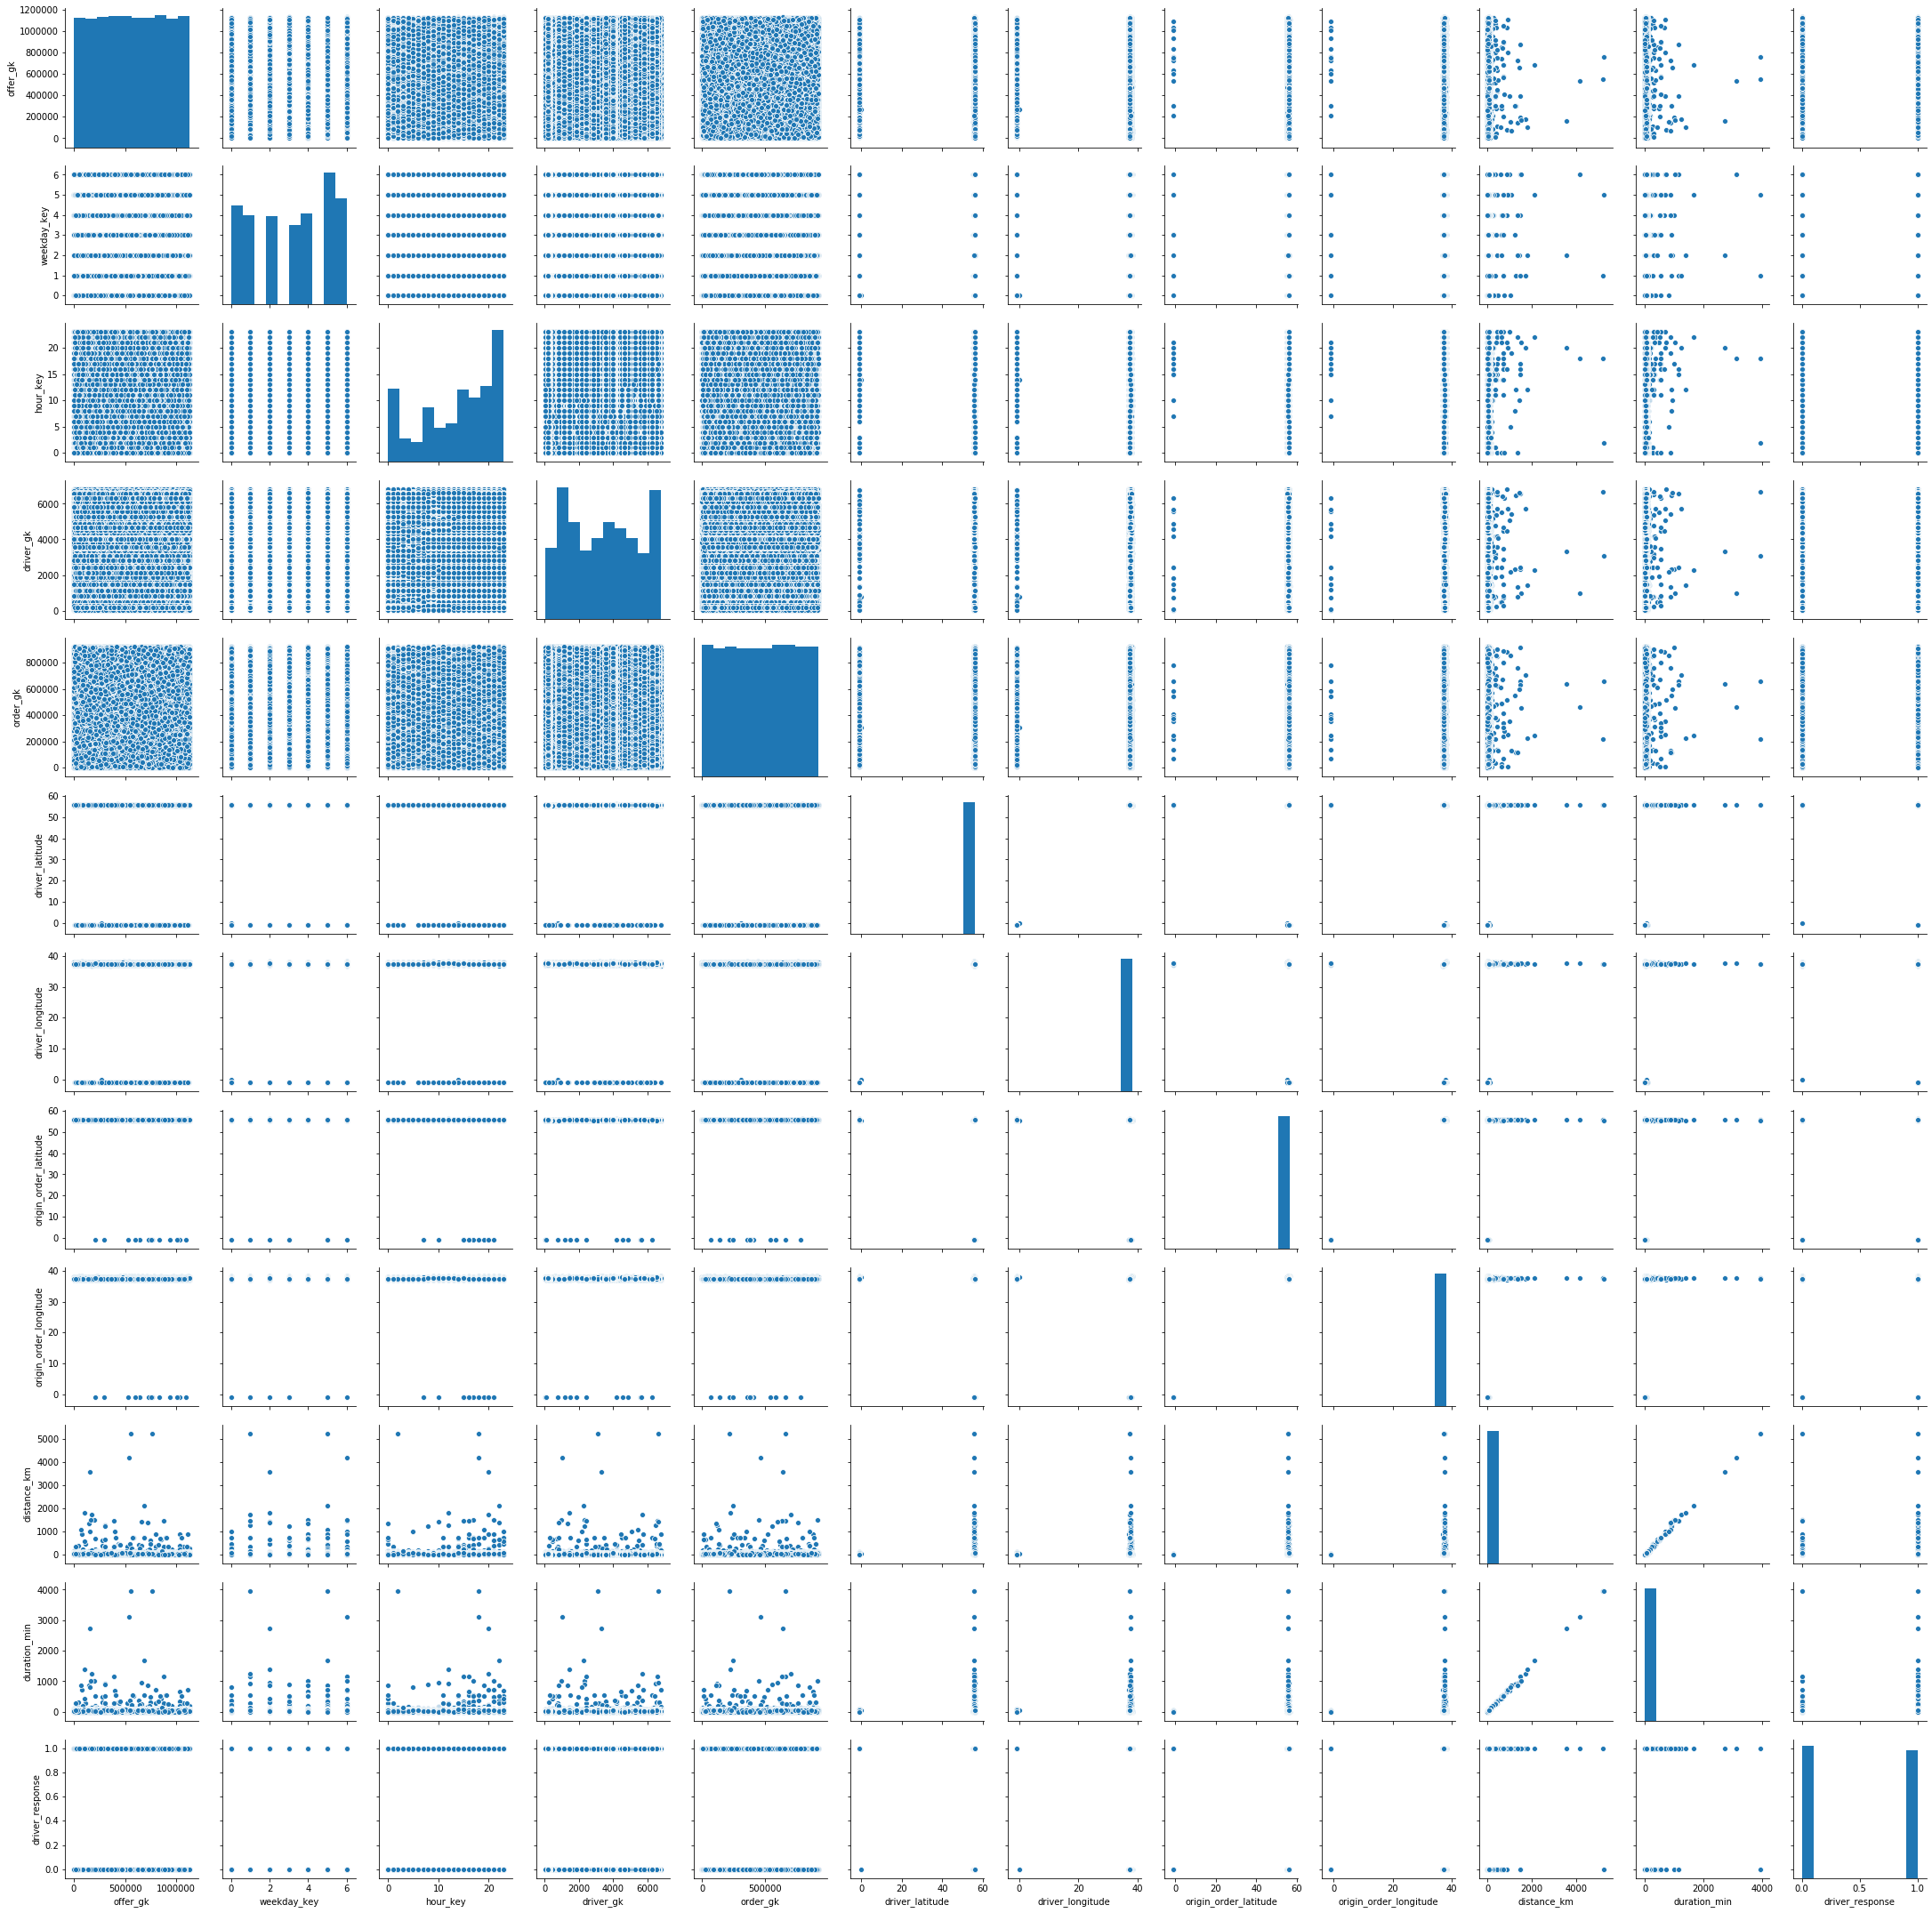

In [0]:
sns.pairplot(data)

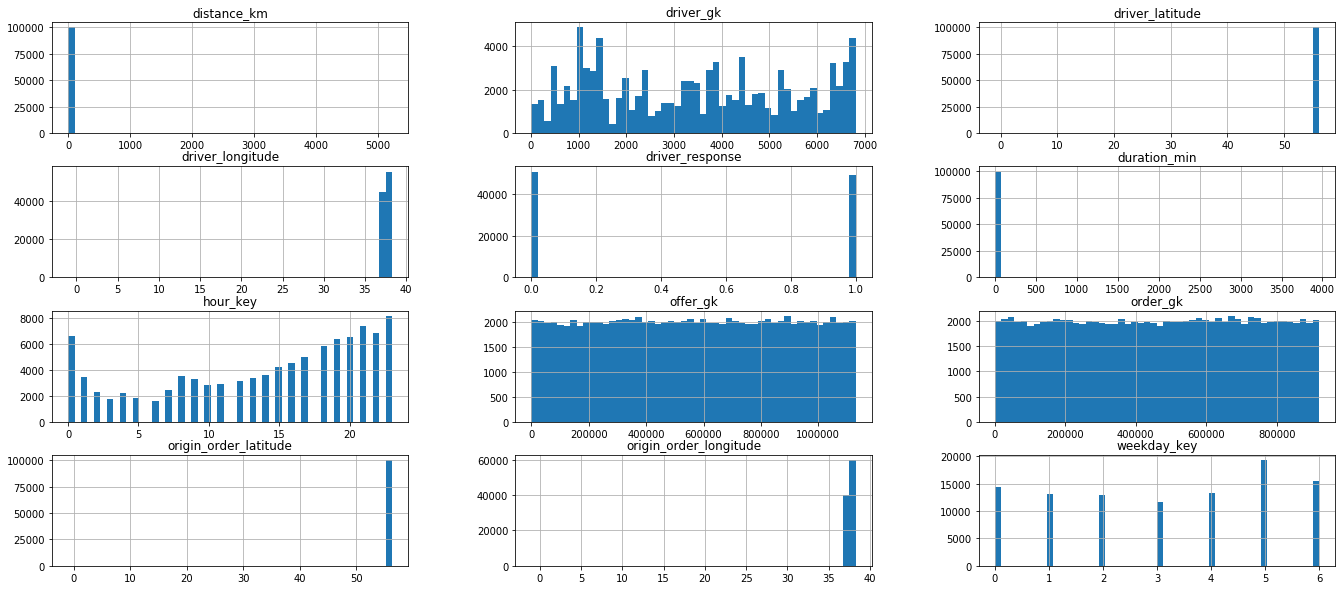

In [0]:
data.hist(figsize=(23,10), bins=50)
plt.show()

In [0]:
print(len(data[data['driver_latitude']== -1]))
print(len(data[data['driver_longitude']== -1]))

140
140


In [0]:
data[data['driver_latitude']== -1]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
565,638186,5,14,6272,817074,-1.0,-1.0,55.908664,37.597781,-1.000,-1.00,Standard,business,1
2111,567790,1,12,6792,820788,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2129,302376,1,1,6792,548327,-1.0,-1.0,55.415361,37.898917,83.923,81.35,Standard,business,1
2137,427612,6,21,6792,32158,-1.0,-1.0,55.415361,37.898917,-1.000,-1.00,Standard,business,1
2142,202875,6,3,6792,346671,-1.0,-1.0,55.415361,37.898917,70.529,65.00,Standard,business,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81694,698969,6,6,2470,862514,-1.0,-1.0,55.699097,37.317988,41.576,43.55,Standard,private,1
83631,1077757,1,7,5578,62551,-1.0,-1.0,55.600737,37.539690,-1.000,-1.00,Delivery,business,1
85335,75929,5,14,468,776944,-1.0,-1.0,55.387756,37.549058,-1.000,-1.00,Standard,business,1
89970,1110601,6,13,259,135435,-1.0,-1.0,55.962322,37.407117,-1.000,-1.00,Standard,business,1


**Dataframe hasn`t NaN values, len 100 000 rows, has anomalies values that we should check. For example distance -1, duration -1, latitude -1 etc.**

Let`s explore duration and distance equal -1

In [0]:
km_1 = data[data['distance_km'] == -1]

In [0]:
dur_1 = data[data['duration_min'] == -1]

In [0]:
print(len(km_1))
print(len(dur_1))

26207
26207


In [0]:
km_1.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,2.620700e+04,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.0,26207.0,26207.000000
mean,5.674399e+05,3.187049,13.902545,3403.428588,457893.998855,55.516776,37.367544,55.774755,37.544930,-1.0,-1.0,0.550769
std,3.250141e+05,1.984842,7.279929,2037.227471,265946.748002,3.867841,2.628086,0.517382,0.369329,0.0,0.0,0.497425
min,4.900000e+01,0.000000,0.000000,14.000000,18.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,0.000000
25%,2.874420e+05,1.000000,9.000000,1421.000000,225553.500000,55.716238,37.413543,55.716603,37.408914,-1.0,-1.0,0.000000
50%,5.679610e+05,3.000000,16.000000,3416.000000,460415.000000,55.767611,37.541557,55.767051,37.540491,-1.0,-1.0,1.000000
75%,8.460230e+05,5.000000,20.000000,5222.000000,686546.000000,55.927339,37.621003,55.933188,37.621850,-1.0,-1.0,1.000000
max,1.130236e+06,6.000000,23.000000,6806.000000,920301.000000,56.174097,38.280547,56.311121,38.243608,-1.0,-1.0,1.000000


In [0]:
dur_1.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,2.620700e+04,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.000000,26207.0,26207.0,26207.000000
mean,5.674399e+05,3.187049,13.902545,3403.428588,457893.998855,55.516776,37.367544,55.774755,37.544930,-1.0,-1.0,0.550769
std,3.250141e+05,1.984842,7.279929,2037.227471,265946.748002,3.867841,2.628086,0.517382,0.369329,0.0,0.0,0.497425
min,4.900000e+01,0.000000,0.000000,14.000000,18.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,0.000000
25%,2.874420e+05,1.000000,9.000000,1421.000000,225553.500000,55.716238,37.413543,55.716603,37.408914,-1.0,-1.0,0.000000
50%,5.679610e+05,3.000000,16.000000,3416.000000,460415.000000,55.767611,37.541557,55.767051,37.540491,-1.0,-1.0,1.000000
75%,8.460230e+05,5.000000,20.000000,5222.000000,686546.000000,55.927339,37.621003,55.933188,37.621850,-1.0,-1.0,1.000000
max,1.130236e+06,6.000000,23.000000,6806.000000,920301.000000,56.174097,38.280547,56.311121,38.243608,-1.0,-1.0,1.000000


Dataframes with distance = -1, duration = -1 are same

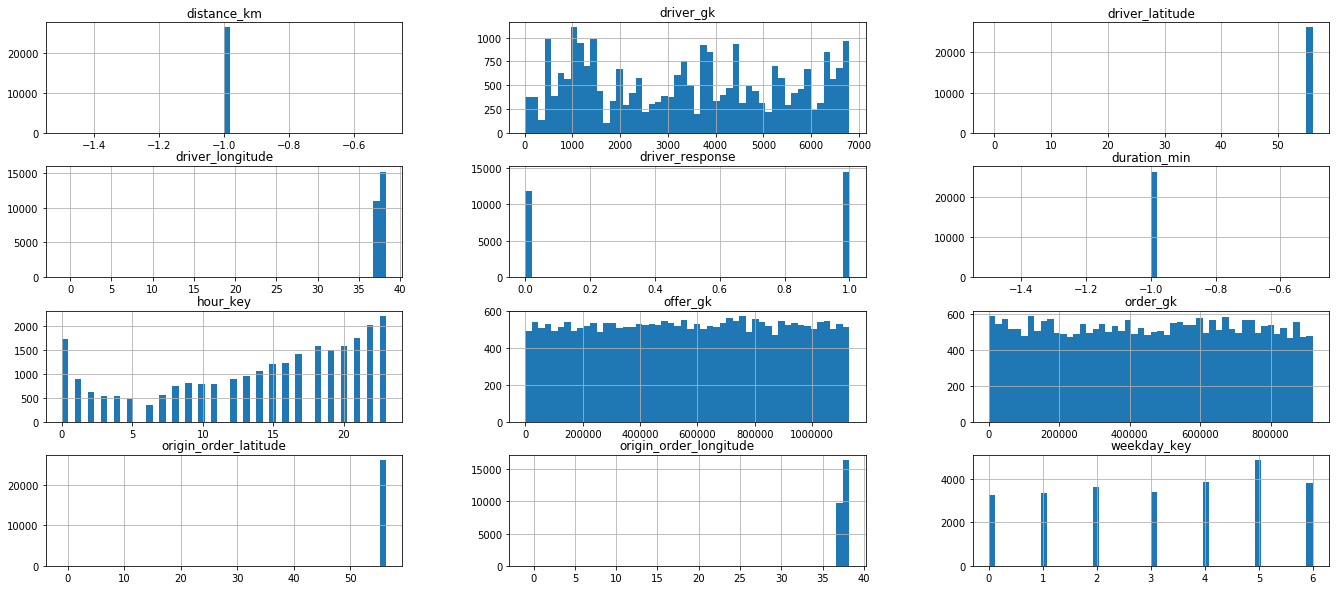

In [0]:
km_1.hist(figsize=(23,10), bins=50)
plt.show()

In [0]:
km_1['origin_order_latitude'].value_counts()

55.962322    3634
55.410307    1215
55.964892     764
55.966694     509
55.414491     244
             ... 
55.819794       1
55.724227       1
55.851318       1
55.746426       1
55.778639       1
Name: origin_order_latitude, Length: 11960, dtype: int64

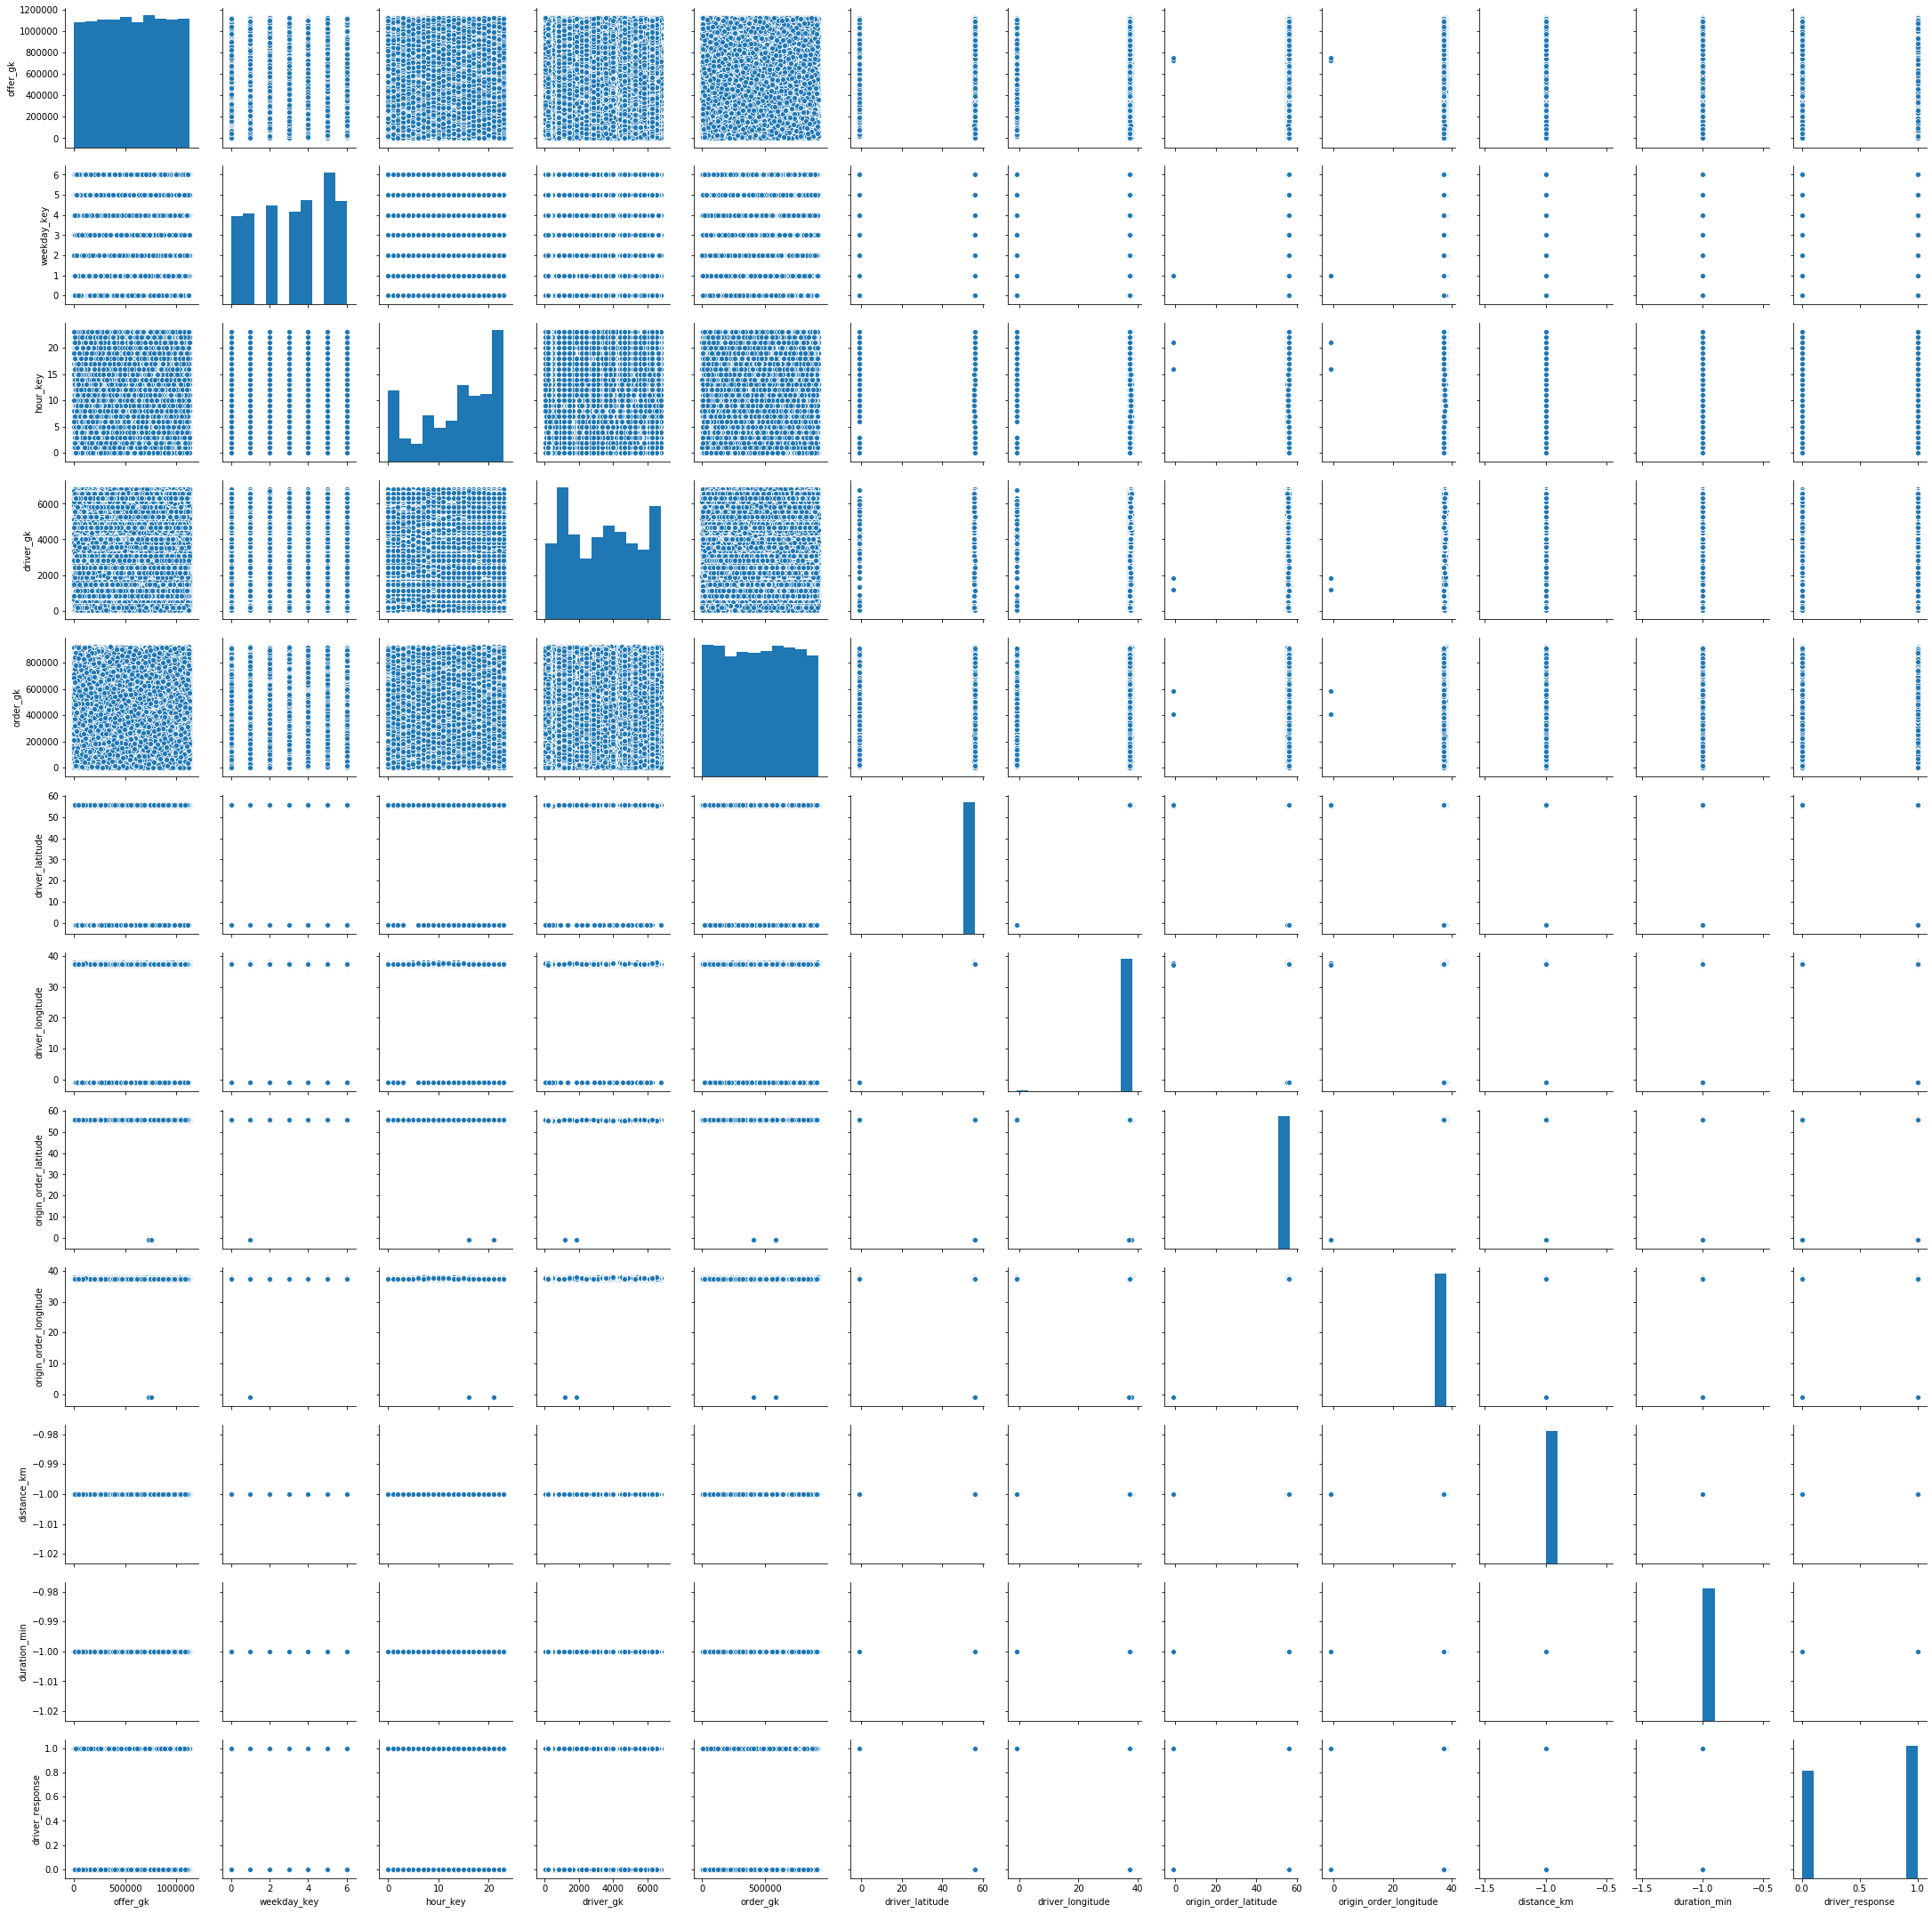

In [0]:
sns.pairplot(km_1)

In [0]:
a = km_1[km_1['origin_order_longitude'] > 35]

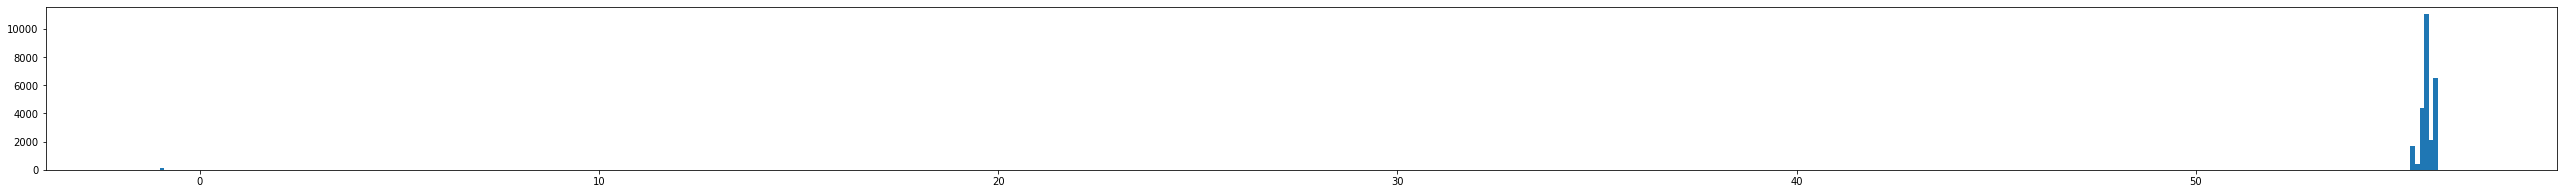

In [0]:
fig, ax = plt.subplots(figsize=(45, 3))
ax.hist(a['driver_latitude'], bins=500)
plt.show()

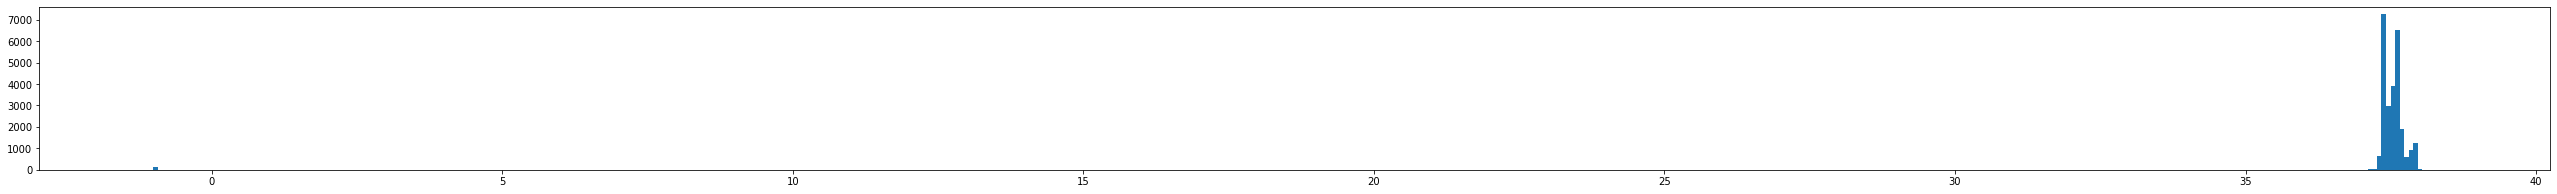

In [0]:
fig, ax = plt.subplots(figsize=(45, 3))
ax.hist(a['driver_longitude'], bins=500)
plt.show()

0    55.962322
dtype: float64


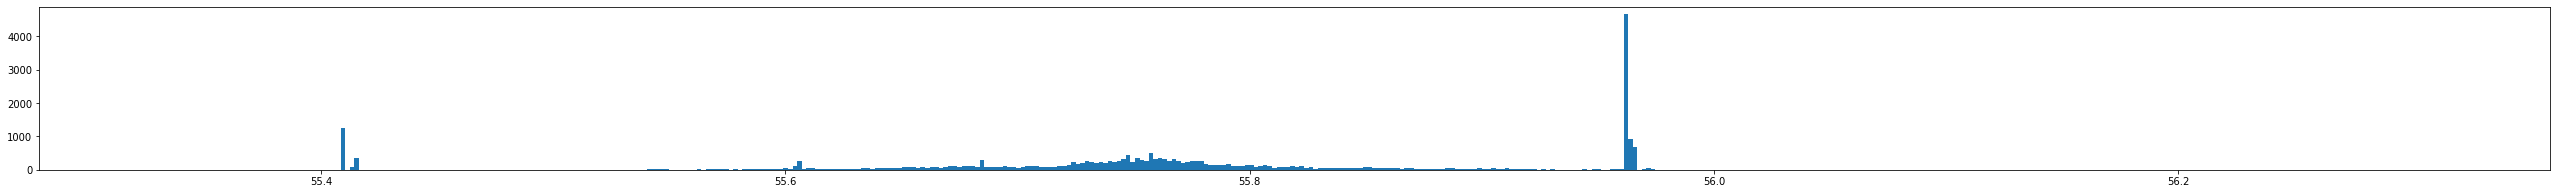

In [0]:
fig, ax = plt.subplots(figsize=(45, 3))
ax.hist(a['origin_order_latitude'], bins=500)
print(a['origin_order_latitude'].mode())
plt.show()

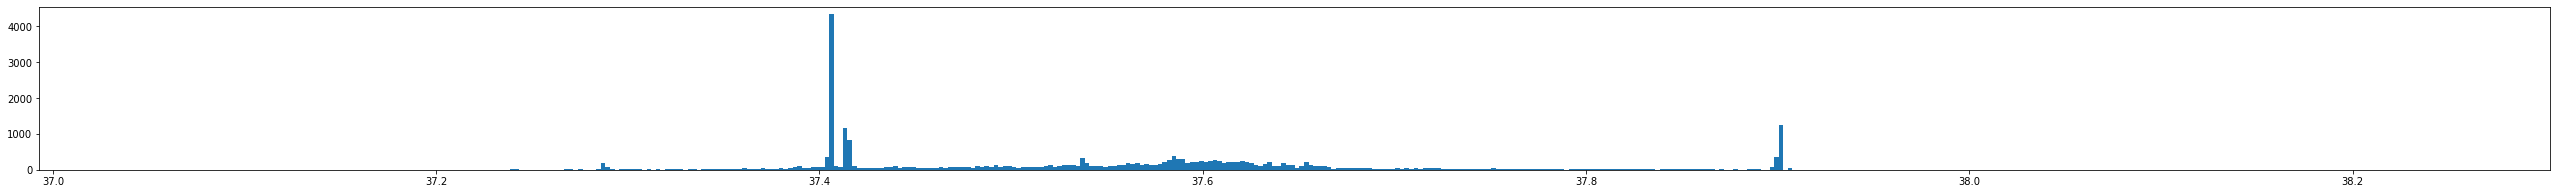

In [0]:
fig, ax = plt.subplots(figsize=(45, 3))
ax.hist(a['origin_order_longitude'], bins=500)
plt.show()

In [0]:
km_1[km_1['origin_order_latitude'] == 55.962322]

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
476,914893,1,12,3016,652492,55.964026,37.418617,55.962322,37.407117,-1.0,-1.0,Standard,private,1
1702,925948,5,17,1479,885698,55.964016,37.422265,55.962322,37.407117,-1.0,-1.0,Standard,private,1
1853,33333,3,0,5828,863284,55.962541,37.410077,55.962322,37.407117,-1.0,-1.0,Standard,business,0
1859,121582,4,22,5828,684221,55.959313,37.411461,55.962322,37.407117,-1.0,-1.0,Standard,business,1
1942,1115509,4,22,5828,401527,55.962389,37.407946,55.962322,37.407117,-1.0,-1.0,Standard,business,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,7633,0,22,2442,841191,55.961383,37.413560,55.962322,37.407117,-1.0,-1.0,Economy,private,0
99978,824750,0,20,2442,290491,55.961376,37.413560,55.962322,37.407117,-1.0,-1.0,Economy,private,0
99979,1088748,1,2,2442,458538,55.961383,37.413560,55.962322,37.407117,-1.0,-1.0,Standard,private,0
99981,397745,1,23,2442,383092,55.961397,37.413560,55.962322,37.407117,-1.0,-1.0,Standard,private,0


As we see inside dataframe with distance and duration = -1 has the anomalies like values of latitude and longitude, 3634 rows with the same order coordinates

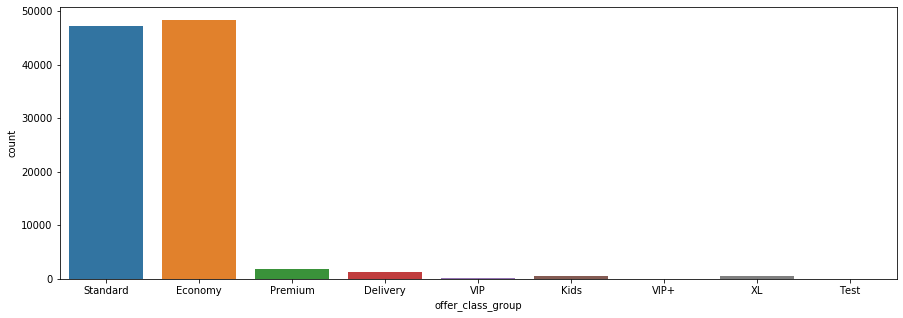

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(x='offer_class_group', 
              order=km_1['offer_class_group'].value_counts().index, 
              data=data)
plt.show()

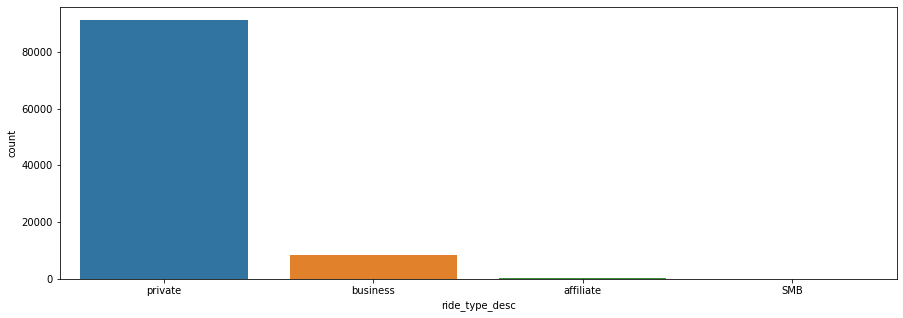

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(x='ride_type_desc', 
              order=km_1['ride_type_desc'].value_counts().index, 
              data=data)
plt.show()

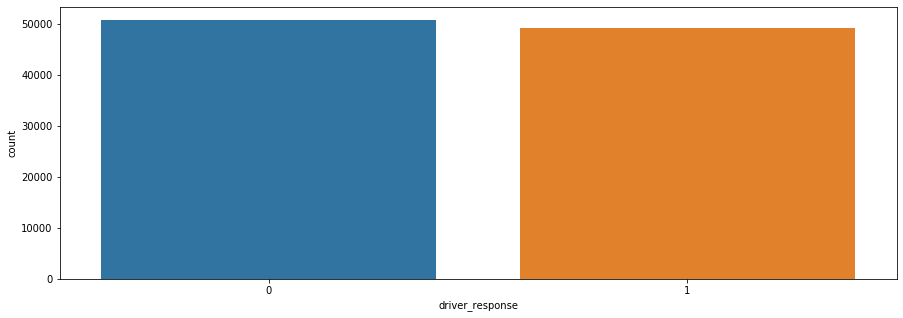

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(x='driver_response', 
              data=data)
plt.show()

The shares of 0 and 1 in driver response, or shares of  private in ride type, and shares of standart or econimy in class group are same with natural dataset

Now we should deal what we will do with values equal -1, my suggestion its divide essential dataset by two dataframes, first with distance != -1, second with distance == -1, targets is distance and duration, fit and predict the model on the second dataframe, check error and if it ok predict targets by the first dataframe.

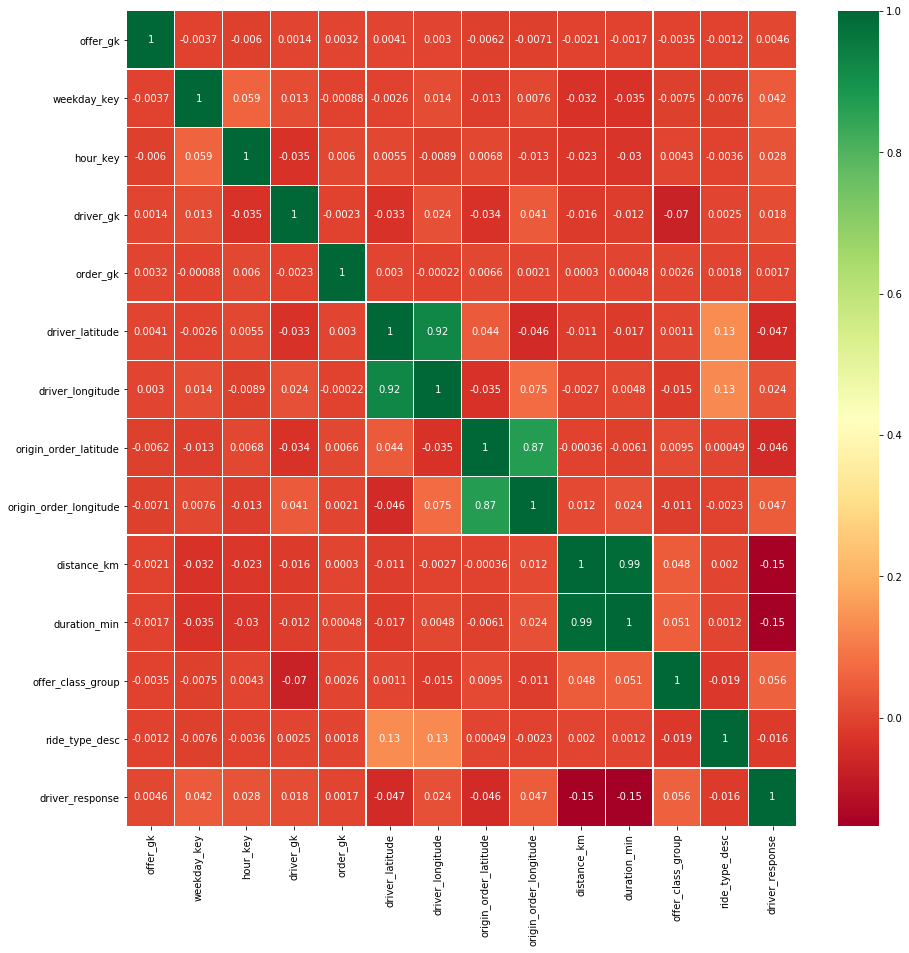

In [0]:
# As we might see, we have only few correlation features, coordinates and duration vs distance
plt.figure(figsize=(15,15))
sns.heatmap(km.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

In [0]:
km = data[data['distance_km'] != -1]

In [0]:
km['distance_km'].min()

0.0

In [0]:
km_1['distance_km'].min()

-1.0

In [0]:
print(len(km['distance_km']))
print(len(km_1['distance_km']))
print(len(km['distance_km']) + len(km_1['distance_km']))

73793
26207
100000


In [0]:
#Transform categorical features
offer_type = preprocessing.LabelEncoder()
km.offer_class_group = offer_type.fit_transform(km.offer_class_group)
ride_type = preprocessing.LabelEncoder()
km.ride_type_desc = ride_type.fit_transform(km.ride_type_desc)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
km.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,4,2,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,1,2,0
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,2,1
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,1,2,0
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,1,2,0


In [0]:
headers = list(km.columns.values)

In [0]:
scaler = preprocessing.StandardScaler()
km_scal = scaler.fit_transform(km)
km_norm = pd.DataFrame(km_scal)
km_norm.columns = headers
km_norm.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,0.594455,0.890088,0.027169,1.284109,-0.387633,0.042391,-0.033810,0.067073,-0.148719,-0.141002,-0.181655,1.126208,0.047778,1.058128
1,-0.456101,1.371269,0.027169,1.284109,1.519499,0.051741,-0.296067,0.060744,-0.374247,-0.403356,-0.613234,-0.841363,0.047778,-0.945065
2,1.698850,0.408906,0.300552,1.284109,0.168310,0.040481,-0.023499,0.057556,-0.026223,-0.280699,-0.348693,-0.841363,0.047778,1.058128
3,1.509272,1.371269,0.163861,1.284109,-0.381793,0.057138,-0.275152,0.060744,-0.374247,-0.403356,-0.613234,-0.841363,0.047778,-0.945065
4,-1.339184,0.890088,0.847320,1.284109,-0.779969,0.079176,-0.450953,0.094915,-0.474585,-0.517176,-0.777473,-0.841363,0.047778,-0.945065


In [0]:
X_km_norm = km_norm.drop(['distance_km', 'duration_min', 'offer_gk', 'driver_gk', 'order_gk', 'driver_latitude', 'driver_longitude', 'driver_response'], axis=1)
Y1_km_norm = km_norm['distance_km']
Y2_km_norm = km_norm['duration_min']

In [0]:
X_km = km.drop(['distance_km', 'duration_min', 'offer_gk', 'driver_gk', 'order_gk', 'driver_latitude', 'driver_longitude'], axis=1)
Y1_km = km['distance_km']
Y2_km = km['duration_min']

In [0]:
X = X_km_norm
y = Y2_km_norm

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
X_train.head()

,weekday_key,hour_key,origin_order_latitude,origin_order_longitude,offer_class_group,ride_type_desc
25089,-1.034638,-0.519599,-0.114637,-0.097296,1.126208,0.047778
23968,-1.515820,1.120704,0.268085,-0.267328,-0.841363,0.047778
72465,-1.515820,-0.246215,0.268096,-0.267745,-0.841363,0.047778
11035,-1.034638,0.984012,-0.213439,0.363236,-0.841363,0.047778
20881,0.408906,-1.066366,0.267637,-0.269275,1.126208,0.047778


In [0]:
y_train.head()

25089    0.592819
23968   -0.058483
72465   -0.003895
11035   -0.444348
20881   -0.247440
Name: duration_min, dtype: float64

In [0]:
estimator = LinearRegression()
estimator.fit(X_train, y_train)

y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.014041628933022077
RMSE: 	 0.6711405273255954
MAE: 	 0.4207079910324271


In [0]:
estimator.score(X_test, y_test)

0.014041628933022075

**I have tried a lot of different variant between features, minmax or standart scaller, normalize or not normalize data and the best result was a 30% accuracy, this is a bad result. Whit this approach I have thought to fill distance and duration equal -1 with the prediction of linear regression. Will try to find another approach.**

In [0]:
X = km.drop(['driver_response'], axis=1)
y = km['driver_response']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
X_train.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc
33236,511425,1,10,3777,641234,55.693857,37.496098,55.690074,37.492009,37.647,52.883,4,2
31785,411542,0,22,6762,500285,55.965655,37.416533,55.962314,37.407325,24.681,29.617,1,2
98394,1051176,0,12,6302,53360,55.964894,37.413532,55.962322,37.407117,30.566,31.567,1,2
14796,879825,1,21,4245,167766,55.619165,37.713577,55.619794,37.721377,6.788,15.833,1,2
27750,430453,4,6,1060,395379,55.961859,37.407126,55.961995,37.406355,18.088,22.867,4,2


**We have found needed model it is the Random forest on the dataset without -1 values in duration and distance, but we should decide, what we will do with -1 values that we can use this approach by the whole dataset**

In [0]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
tra_score=rf.score(X_test, y_test)
print("Training accuracy ",tra_score)

Training accuracy  1.0


In [0]:
y_pred = rf.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, rf.predict(X_test)))
print(accuracy_score(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80     15335
           1       0.77      0.87      0.82     14665

    accuracy                           0.81     30000
   macro avg       0.82      0.81      0.81     30000
weighted avg       0.82      0.81      0.81     30000

0.8115


In [0]:
# for a, v in zip(y_test, y_pred):
#   print('True: {}, Pred: {}'.format(a, v))

In [0]:
import xgboost as xgb

modelXGB = xgb.XGBRegressor().fit(X, y)
print(mean_squared_error(y_test, modelXGB.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[09:42:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.15406523240496028


**Let`s compare error of our model with error on the whole dataframe**

In [0]:
offer_type = preprocessing.LabelEncoder()
data.offer_class_group = offer_type.fit_transform(data.offer_class_group)
ride_type = preprocessing.LabelEncoder()
data.ride_type_desc = ride_type.fit_transform(data.ride_type_desc)

In [0]:
X = data.drop(['driver_response'], axis=1)
y = data['driver_response']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
X_train.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc
65978,584949,6,10,5778,51458,55.750012,37.864280,55.754743,37.877793,48.407,43.850,1,3
14863,244953,2,15,4245,364741,55.743312,37.614898,55.740676,37.617120,-1.000,-1.000,4,3
64580,575280,2,13,5967,443435,55.777048,37.522897,55.779994,37.535077,-1.000,-1.000,4,3
80504,69411,2,20,3180,77547,55.743810,37.592123,55.751043,37.587340,5.964,13.467,1,3
17744,77043,3,21,6800,206065,55.679953,37.286820,55.671992,37.279881,2.973,9.317,1,3


In [0]:
# Сделаем инициализацию параметров, по которым хотим сделать полный перебор
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
parameters = {'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.7min


KeyboardInterrupt: ignored

In [0]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=100)
rf.fit(X_train, y_train)
tra_score=rf.score(X_test, y_test)
print("Training accuracy ",tra_score)

Training accuracy  0.8059897009666637


In [0]:
y_pred = rf.predict(X_test)

In [0]:
print(classification_report(y_test, rf.predict(X_test)))
print(accuracy_score(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80     15335
           1       0.77      0.87      0.82     14665

    accuracy                           0.81     30000
   macro avg       0.82      0.81      0.81     30000
weighted avg       0.82      0.81      0.81     30000

0.8109333333333333


**In comparing between two variant the accuracy almost the same, but we must improve 81% of accuracy, That mean -1 values don`t influence ont the results**

**Let`s try logistic regression for prediction driver response**

In [0]:
km.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,4,2,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,1,2,0
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,2,1
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,1,2,0
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,1,2,0


In [0]:
X = km.drop(['driver_response'], axis=1)
y = km['driver_response']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
X_train.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc
33236,511425,1,10,3777,641234,55.693857,37.496098,55.690074,37.492009,37.647,52.883,4,2
31785,411542,0,22,6762,500285,55.965655,37.416533,55.962314,37.407325,24.681,29.617,1,2
98394,1051176,0,12,6302,53360,55.964894,37.413532,55.962322,37.407117,30.566,31.567,1,2
14796,879825,1,21,4245,167766,55.619165,37.713577,55.619794,37.721377,6.788,15.833,1,2
27750,430453,4,6,1060,395379,55.961859,37.407126,55.961995,37.406355,18.088,22.867,4,2


In [0]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [0]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67     11748
           1       0.63      0.69      0.66     10390

    accuracy                           0.66     22138
   macro avg       0.66      0.66      0.66     22138
weighted avg       0.67      0.66      0.66     22138



**We see that RandomForest is better, but we should try to improve previous results**

In [0]:
km_1.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.0,-1.0,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.0,-1.0,Economy,private,1
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.0,-1.0,Standard,business,1
19,533917,5,8,6080,596531,55.913718,37.401395,55.921554,37.403505,-1.0,-1.0,Standard,business,0
21,123897,4,12,6080,185909,55.766763,37.607275,55.772388,37.606330,-1.0,-1.0,Standard,business,0


In [0]:
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1



Intersting observation with distance and duration equals 0, and origin_order_latitude - 55.962322, origin_order_longitude - 37.407117, maybe this is airport or some outlet shops place or district, here we have almost all driver_response = 0

In [0]:
km_0 = km[km['distance_km']==0]
print(km_0['origin_order_latitude'].mode())
print(km_0['origin_order_longitude'].mode())

0    55.962322
dtype: float64
0    37.407117
dtype: float64


In [0]:
km = data[data['distance_km'] != -1]

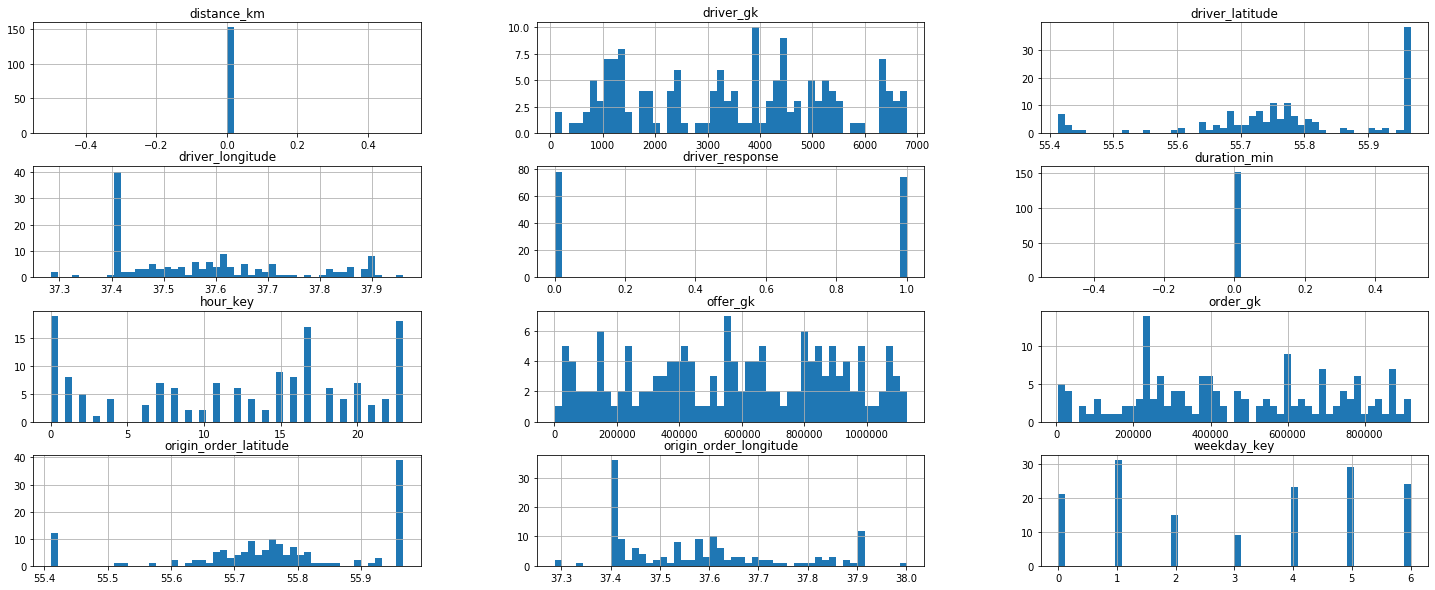

In [0]:
km[km['distance_km']==0].hist(figsize=(25, 10), bins=50)
plt.show()

In [0]:
km = km[km['distance_km'] < 20]

NameError: ignored

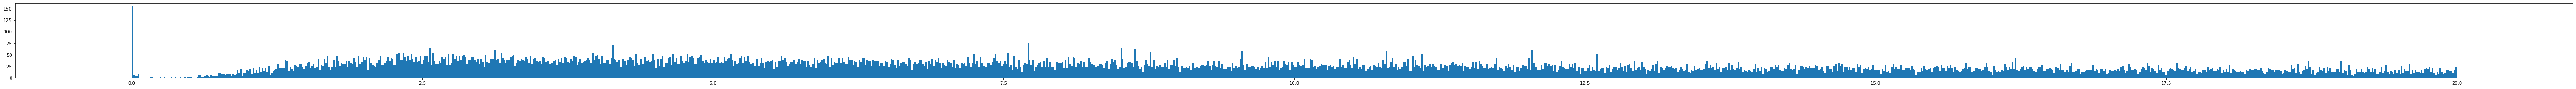

In [0]:
fig, ax = plt.subplots(figsize=(100, 3))
ax.hist(km['distance_km'], bins=1500)
plt.show()

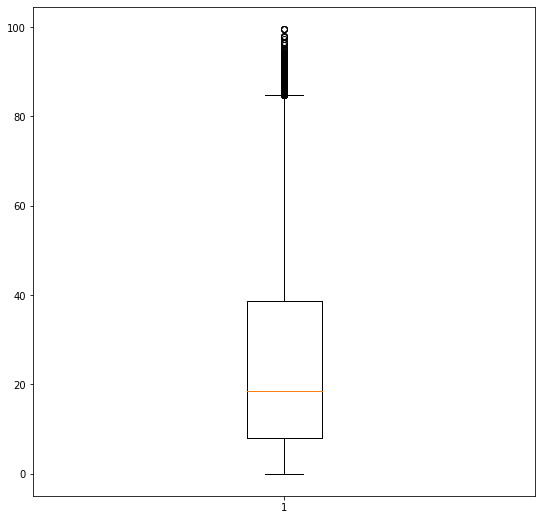

In [0]:
fig, ax = plt.subplots(figsize=(9, 9))
plt.boxplot(km['distance_km'])
plt.show()

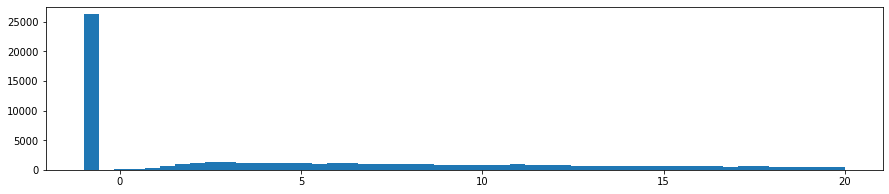

In [0]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(km['distance_km'], bins=50)
plt.show()